In [115]:
import pandas as pd

df = pd.read_csv('./aug_train.csv')

print(df.head())

   enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624    NaN   
3        33241  city_115                   0.789    NaN   
4          666  city_162                   0.767   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience                 NaN        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM        >20          NaN             NaN            1   
1             STEM         15        50-99         Pvt Ltd           >4   
2             STEM     

In [116]:
df.fillna(0, inplace=True)
print(df.info())
data = pd.get_dummies(df, drop_first=True)
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  19158 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     19158 non-null  object 
 6   education_level         19158 non-null  object 
 7   major_discipline        19158 non-null  object 
 8   experience              19158 non-null  object 
 9   company_size            19158 non-null  object 
 10  company_type            19158 non-null  object 
 11  last_new_job            19158 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

,enrollee_id,city_development_index,training_hours,target,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,city_city_104,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,8949,0.920,36,1.0,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
1,29725,0.776,47,0.0,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,11561,0.624,83,0.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,33241,0.789,52,1.0,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
4,666,0.767,8,0.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,0.878,42,1.0,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
19154,31398,0.920,52,1.0,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
19155,24576,0.920,44,0.0,False,False,False,False,True,False,...,False,False,False,True,False,False,False,True,False,False
19156,5756,0.802,97,0.0,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False


In [117]:
data = data.drop('target', axis=1)
target = df['target'].to_numpy()


In [118]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=22)

In [119]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(data_train)

train_scaled = ss.transform(data_train)
test_scaled = ss.transform(data_test)

In [120]:
from sklearn.tree import DecisionTreeClassifier
# 결정트리
de = DecisionTreeClassifier(random_state=22)
de.fit(data_train, target_train)

DecisionTreeClassifier(random_state=22)

In [121]:
from sklearn.linear_model import LogisticRegression
# 로지스틱 회귀
lr = LogisticRegression()
lr.fit(train_scaled, target_train)

print(lr.score(train_scaled, target_train))
print(lr.score(test_scaled, target_test))

0.7892470311888294
0.7802713987473904


In [122]:
target_pred = de.predict(data_test)
print(target_pred)

[0. 1. 0. ... 0. 0. 1.]


In [123]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(target_test, target_pred)
print(f'정확도 : {accuracy}')

정확도 : 0.7100730688935282


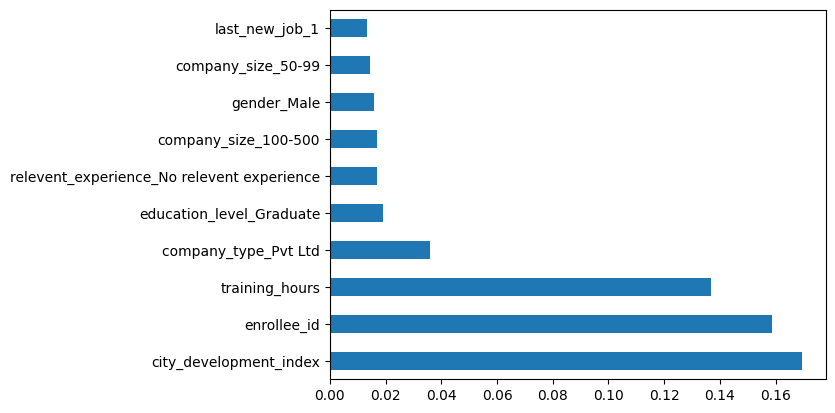

In [124]:
import matplotlib.pyplot as plt

feature_importances = pd.Series(de.feature_importances_, index=data.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()


In [125]:
data = df[['training_hours', 'enrollee_id', 'city_development_index']]
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=22)
de.fit(data_train, target_train)
target_pred = de.predict(data_test)

accuracy = accuracy_score(target_test, target_pred)
print(f'정확도 : {accuracy}')

정확도 : 0.6842379958246346


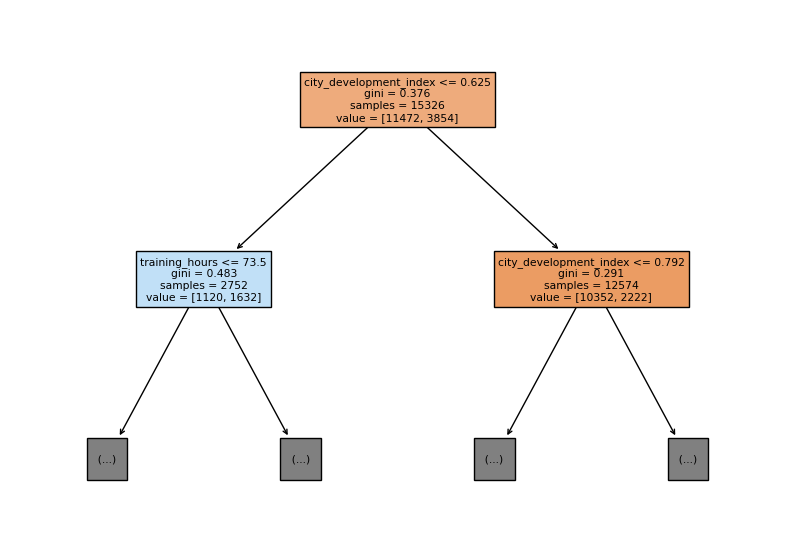

In [126]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(de, max_depth=1, filled=True, feature_names=['training_hours', 'enrollee_id', 'city_development_index'])
plt.show()

In [127]:
new_data = pd.DataFrame({
    'training_hours' : [40],
    'enrollee_id' : [29225],
    'city_development_index': [0.720]
    })
pro = de.predict_proba(new_data)
print(pro[0][0])

1.0
